In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from agg import prep_demand_features
from agg_utils import stly_cols_agg, ly_cols_agg, stly_pace_cols, ty_pace_cols

pd.options.display.max_rows = 150
pd.options.display.max_columns = 250
pd.options.display.max_colwidth = None

DATE_FMT = "%Y-%m-%d"
h1_capacity = 187
h2_capacity = 226
AOD = "2017-08-01"
AOD_dt = pd.to_datetime(AOD)

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")
h1_pricing = (pd.read_csv("../data/results/h1_pricing_v2.csv",
                          parse_dates=["AsOfDate", "StayDate"]))
h2_pricing = (pd.read_csv("../data/results/h2_pricing_v2.csv",
                          parse_dates=["AsOfDate", "StayDate"]))

In [3]:
len(h1_res)

40060

In [4]:
len(h2_res)

79330

In [45]:
# pretty confusion matrix

confusion = np.array([[928, 85],
                      [349 , 403]]
                    )

confusion_2 = np.array([[1625, 202],
                        [568, 615]])

confusion = confusion + confusion_2

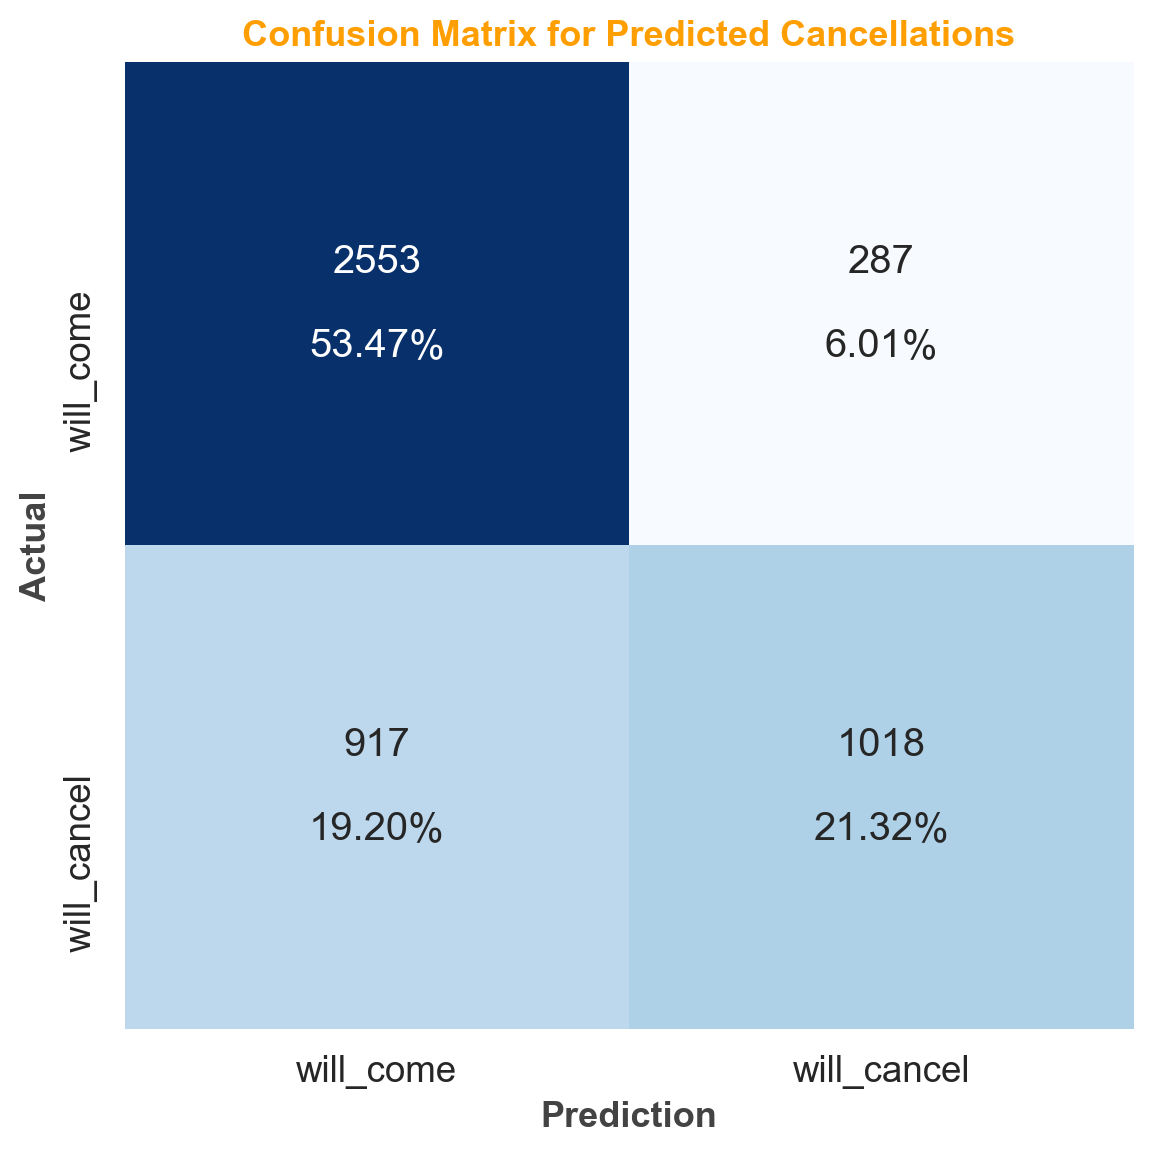

In [55]:
save_to = "../etc/combined_cxl_confusion.jpeg"

fig, ax = plt.subplots(dpi=200, figsize=(6,6))
sns.set(font_scale=1.2)
group_counts = ["{0:0.0f}".format(value) for value in confusion.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in confusion.flatten() / np.sum(confusion)
]
labels = [f"{v2}\n\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

title = "Cancellation Forecast Predictions"
label_font = {
    "family": "Arial",
    "color": "#434343",
    "weight": "bold",
    "size": 13,
}
title_font = {
    "family": "Arial",
    "color": "#ff9e00",
    "weight": "bold",
    "size": 13,
}

sns.heatmap(
    confusion,
    annot=labels,
    fmt="",
    cmap="Blues",
    cbar=False,
    xticklabels=["will_come", "will_cancel"],
    yticklabels=["           will_come", "          will_cancel"],
)

title = "Confusion Matrix for Predicted Cancellations"
plt.title(title, fontdict=title_font)
plt.xlabel("Prediction", fontdict=label_font)
plt.ylabel("Actual", fontdict=label_font)
plt.tight_layout()
plt.savefig(
    save_to, dpi=225, facecolor='white', bbox_inches="tight", pad_inches=1.1
)
plt.show()

In [53]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        